# 1- Use PyEIS to simulate Warburg and CPE (Constant Phase Element)
## 1.1 Use PyEIS to simulate Warburg

In [4]:
import PyEIS as pe

### 1.1.1 Generate frequency and w (angle speed)

In [5]:
f_range = pe.freq_gen(f_start=10 ** 7, f_stop=10 ** (-6), pts_decade = 10)

In [6]:
def cir_warburg(sigma, w):
    z = sigma * (w ** 0.5) * (1 - 1j)
    return z

### 1.1.2 Calculate Warburg impedance with cir_warburg and f_range

In [7]:
z_W = cir_warburg(sigma = 150, w = f_range[1])

In [9]:
print('First five Z', z_W[:5])
print('Last five Z', z_W[-5 : ])

First five Z [1188998.1892818 -1188998.1892818j  1058750.42174228-1058750.42174228j
  942770.53206999 -942770.53206999j  839495.55805314 -839495.55805314j
  747533.7508095  -747533.7508095j ]
Last five Z [0.59804186-0.59804186j 0.53252988-0.53252988j 0.47419436-0.47419436j
 0.42224916-0.42224916j 0.37599424-0.37599424j]


In [11]:
import matplotlib.pyplot as plt

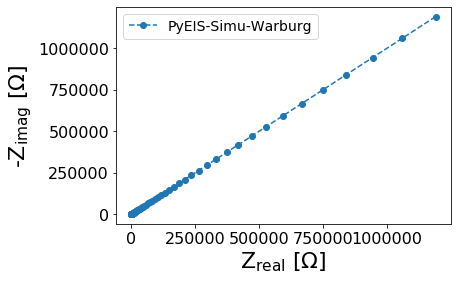

In [13]:
fig = plt.figure()
plt.plot(z_W.real, - z_W.imag, 'o--',label='PyEIS-Simu-Warburg')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')
plt.legend()
plt.show()

## 1.2- Use PyEIS to simulate CPE (Constant Phase Element)

# 以下cir_CPE_full函数是错误的

In [45]:
import math
def cir_CPE_full(w, q, n):
    # w: frequency
    # q: admittance <==> Y0
    # n: CPE coefficient
    # z = 1 / (q * (w ** (-n)) * (math.cos(n * math.pi / 2) - 1j * math.sin(n * math.pi / 2))))
    denominator_head  = q * (w ** (n))
    denominator_tail = math.cos(n * math.pi / 2) - 1j * math.sin(n * math.pi / 2)
    z = 1 / (denominator_head * denominator_tail)
    return z

In [41]:
math.pi

3.141592653589793

When n =  0 The CPE == R


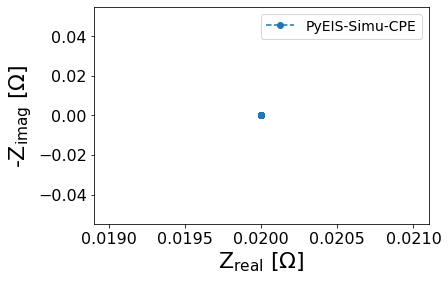

In [42]:
n = 0
z_cpe = cir_CPE_full(w = f_range[1], q = 50, n = n)
print('When n = ', n, 'The CPE == R')

fig = plt.figure()
plt.plot(z_cpe.real, - z_cpe.imag, 'o--',label='PyEIS-Simu-CPE')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')

plt.legend()
plt.show()

When n =  1 The CPE == C


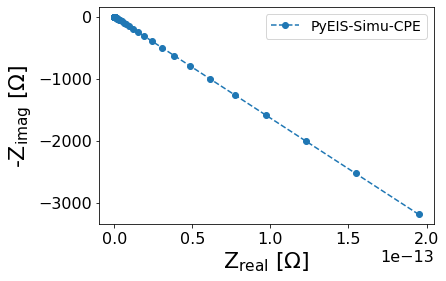

[1.94908592e-26+3.18309886e-10j 2.45813753e-26+4.01444323e-10j
 3.10014046e-26+5.06291359e-10j 3.90981821e-26+6.38521770e-10j
 4.93096317e-26+8.05287397e-10j 6.21880519e-26+1.01560796e-09j
 7.84299876e-26+1.28085890e-09j 9.89139033e-26+1.61538663e-09j
 1.24747696e-25+2.03728448e-09j 1.57328618e-25+2.56937132e-09j
 1.98418847e-25+3.24042568e-09j 2.50240797e-25+4.08674236e-09j
 3.15597322e-25+5.15409540e-09j 3.98023306e-25+6.50021388e-09j
 5.01976859e-25+8.19790423e-09j 6.33080432e-25+1.03389881e-08j
 7.98424921e-25+1.30392685e-08j 1.00695318e-24+1.64447934e-08j
 1.26994371e-24+2.07397547e-08j 1.60162067e-24+2.61564505e-08j]


In [46]:
n = 1
z_cpe = cir_CPE_full(w = f_range[1], q = 50, n = n)
print('When n = ', n, 'The CPE == C')

fig = plt.figure()
plt.plot(z_cpe.real, - z_cpe.imag, 'o--',label='PyEIS-Simu-CPE')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')

plt.legend()
plt.show()
print(z_cpe[:20])

### 这个图基本上是不对的，当n=1时，CPE == C，Nyquist应该是一条竖线，图中的横坐标非常小，基本为0，这点还可以，但是纵坐标不对

# 以下的CPE是按照 Z_CPE = 1 / (Y0 * ((w * 1j) ** n))，是正确的

In [47]:
def cir_CPE(w, q, n):
    z = 1 / (q * ((w * 1j) ** n))
    return z

When n =  0 The CPE == C


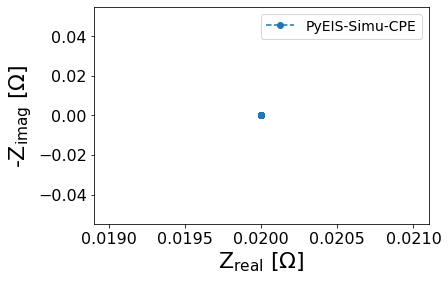

In [48]:
n = 0
z_cpe = cir_CPE(w = f_range[1], q = 50, n = n)
print('When n = ', n, 'The CPE == R')

fig = plt.figure()
plt.plot(z_cpe.real, - z_cpe.imag, 'o--',label='PyEIS-Simu-CPE')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')

plt.legend()
plt.show()

When n =  1 The CPE == C


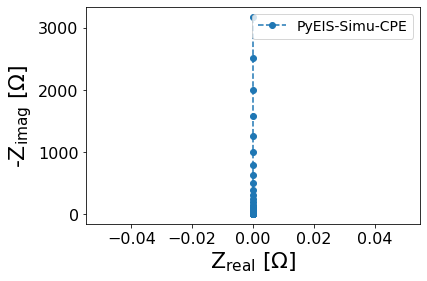

In [49]:
n = 1
z_cpe = cir_CPE(w = f_range[1], q = 50, n = n)
print('When n = ', n, 'The CPE == C')

fig = plt.figure()
plt.plot(z_cpe.real, - z_cpe.imag, 'o--',label='PyEIS-Simu-CPE')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')

plt.legend()
plt.show()

When n =  -1 The CPE == L


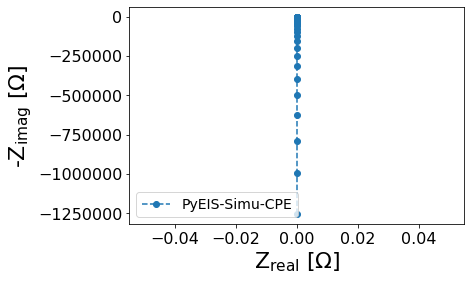

In [50]:
n = -1
z_cpe = cir_CPE(w = f_range[1], q = 50, n = n)
print('When n = ', n, 'The CPE == L')

fig = plt.figure()
plt.plot(z_cpe.real, - z_cpe.imag, 'o--',label='PyEIS-Simu-CPE')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')

plt.legend()
plt.show()

# 2- Create and test my fre_generator, elements (C, L), and plot utils

## 2.1- Create and Test my Frequency generator

In [64]:
import math
"""
EIS模拟实验的频率生成器
    频率由高到低，和实验顺序保持一致
    对数坐标尺度上等间距取点
    生成频率和角度频率两个数据列表
"""
def fre_generator(f_start, f_end, pts_decade):
    """
    :param
        f_start:
            int
            High frequency
            Ex: 7, == 1e7
        f_end:
            int
            Low frequency
            Ex: 7, == 1e-7
        pts_decade:
    :return:
    """
    points_num = (f_start - f_end) * pts_decade
    fre_list = [10 ** (f_start - i * (f_start - f_end) / points_num) for i in range(points_num)]
    w_list = [2 * math.pi * f for f in fre_list]
    return fre_list, w_list

In [62]:
fre_list, w_list = fre_generator(f_start = 7, f_end = -6, pts_decade = 10)
print('Fre length', len(fre_list))
print('First 5 fre', fre_list[:5])
print('First 5 w', w_list[:5])

Fre length 130
First 5 fre [10000000.0, 7943282.347242822, 6309573.44480193, 5011872.336272725, 3981071.7055349695]
First 5 w [62831853.071795866, 49909114.93497507, 39644219.16294998, 31490522.624728613, 25013811.247045696]


In [63]:
log10_fre_list = [math.log(f, 10) for f in fre_list]
print(log10_fre_list[:20])

[7.0, 6.9, 6.799999999999999, 6.699999999999999, 6.599999999999999, 6.499999999999999, 6.3999999999999995, 6.3, 6.2, 6.099999999999999, 5.999999999999999, 5.8999999999999995, 5.799999999999999, 5.699999999999999, 5.6, 5.5, 5.3999999999999995, 5.299999999999999, 5.199999999999999, 5.099999999999999]


## 2.2 - Create and test my Capacitor

In [66]:
def ele_C(w, C):
    # C; F
    return 1 / (1j * w * C)

### There are two ways to generate impedance list with a list input: 
### 1-map function; 
### 2-[fun(i)  for i in d]

In [72]:
C = 40 * 1e-6 # 40 uF
# First way
z_c_1 = list(map(lambda w: ele_C(w, C=40 * 1e-6), w_list))
# Seond way
z_c_2 = [ele_C(w, C) for w in w_list]

print('First 5 z', z_c_1[:5])
print('First 5 z', z_c_2[:5])

First 5 z [-0.00039788735772973834j, -0.0005009105056776036j, -0.0006306089646322024j, -0.0007938896504806882j, -0.000999447855150529j]
First 5 z [-0.00039788735772973834j, -0.0005009105056776036j, -0.0006306089646322024j, -0.0007938896504806882j, -0.000999447855150529j]


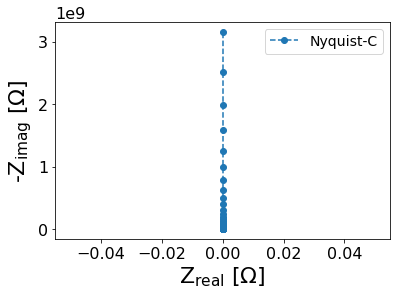

In [82]:
nyquist_plot(z_c_1, plot_label='Nyquist-C')

### 电容的Z-Fre图应该是一条斜率为-1的直线，原因：Z = 1/(jwC), |Z| = 1/(wC) = 1/(2*Pi*f*C), log(|Z|) = log(1/(2*Pi*C)) - log(f)

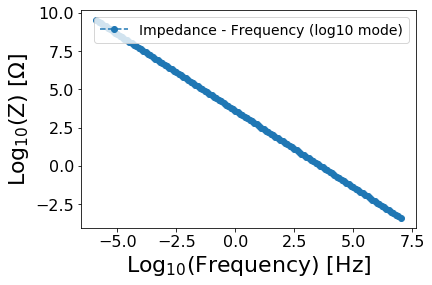

In [80]:
impedance_vs_fre_plot(fre_list, z_c_1, y_axis_stat='log10', x_axis_stat='log10')

## 2.3- Create and test my Inductance L

In [81]:
def ele_L(w, L):
    # L: 
    return 1j * w * L

In [83]:
z_L = [ele_L(w, L=1e-3) for w in w_list]

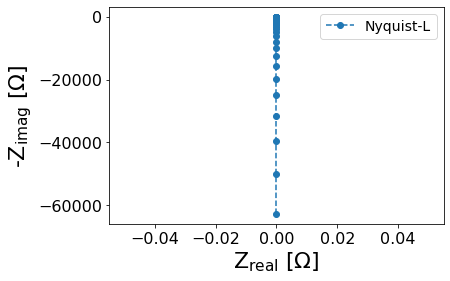

In [85]:
nyquist_plot(z_list=z_L, plot_label='Nyquist-L')

### 电感的Z-Fre图应该是一条斜率为+1的直线，原因：Z = jwL, |Z| = wL = 2*Pi*f*L, log(|Z|) = log(2*Pi*L)) + log(f)

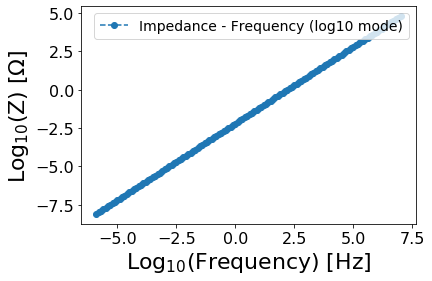

In [86]:
impedance_vs_fre_plot(fre_list, z_list=z_L, y_axis_stat='log10', x_axis_stat='log10')

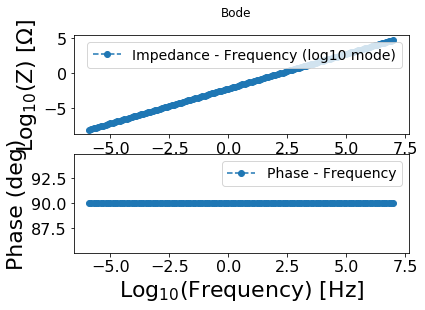

In [100]:
bode_two_plot(fre_list, z_L)

## 2.4- Create and test my plot utils

In [73]:
def nyquist_plot(z_list, plot_label=''):
    z_real_list = [z.real for z in z_list]
    z_imag_list = [z.imag for z in z_list]
    z_inv_imag_list = [-z_imag for z_imag in z_imag_list]

    fig = plt.figure()
    plt.plot(z_real_list, z_inv_imag_list, 'o--', label=plot_label)

    plt.xlabel('Z$_{real}$ [$\Omega$]')
    plt.ylabel('-Z$_{imag}$ [$\Omega$]')
    plt.legend()
    plt.show()

In [79]:
def impedance_vs_fre_plot(fre_list, z_list, y_axis_stat='log10', x_axis_stat='log10'):
    """
    :param
        z_list
        x_axis_stat (Frequency)
            str
                'none':     normal
                'log10':    in log10
        y_axis_stat (Z, Z.real, Z.imag, Z.real + Z.imag)
            str
                'none':         Z normal
                'log10':        Z in log10
                'real':         Z.real in normal
                'real-log10':   Z.real in log10
                'imag':         Z.imag normal
                'imag-log10':   Z.imag in log10
    :return:
        x and y-axis are both in log(base=10) mode
    """
    fre_log10_list = [math.log(f, 10) for f in fre_list]

    z_norm_list = [math.sqrt(z.real ** 2 + z.imag ** 2) for z in z_list]
    z_norm_log10_list = [math.log(z, 10) for z in z_norm_list]

    if y_axis_stat == 'log10' and x_axis_stat == 'log10':
        fig = plt.figure()
        plt.plot(fre_log10_list, z_norm_log10_list, 'o--', label='Impedance - Frequency (log10 mode)')

        plt.xlabel('Log$_{10}$(Frequency) [Hz]')
        plt.ylabel('Log$_{10}$(Z) [$\Omega$]')
        plt.legend()
        plt.show()

In [99]:
def bode_two_plot(fre_list, z_list):
    """
    Draw Impedance and Phase in two plot

    参考教程
        Creating multiple subplots using plt.subplots
        https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
    """
    fre_log10_list = [math.log(f, 10) for f in fre_list]

    z_norm_list = [math.sqrt(z.real ** 2 + z.imag ** 2) for z in z_list]
    z_norm_log10_list = [math.log(z, 10) for z in z_norm_list]

    # tan_list = [z.imag / z.real for z in z_list] # z.real might be zero
    tan_list = []
    for z in z_list:
        if z.real == 0:
            tan_list.append(float('inf'))
        else:
            tan_list.append(z.imag / z.real)
            
    t_list = [math.atan(tan) * 180 / math.pi for tan in tan_list]

    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Bode')

    ax1.plot(fre_log10_list, z_norm_log10_list, 'o--', label='Impedance - Frequency (log10 mode)')

    ax1.set_xlabel(xlabel='Log$_{10}$(Frequency) [Hz]')
    ax1.set_ylabel(ylabel='Log$_{10}$(Z) [$\Omega$]')
    ax1.legend()

    ax2.plot(fre_log10_list, t_list, 'o--', label='Phase - Frequency')
    ax2.set_xlabel(xlabel='Log$_{10}$(Frequency) [Hz]')
    ax2.set_ylabel(ylabel='Phase (deg)')
    ax2.legend()

    plt.show()